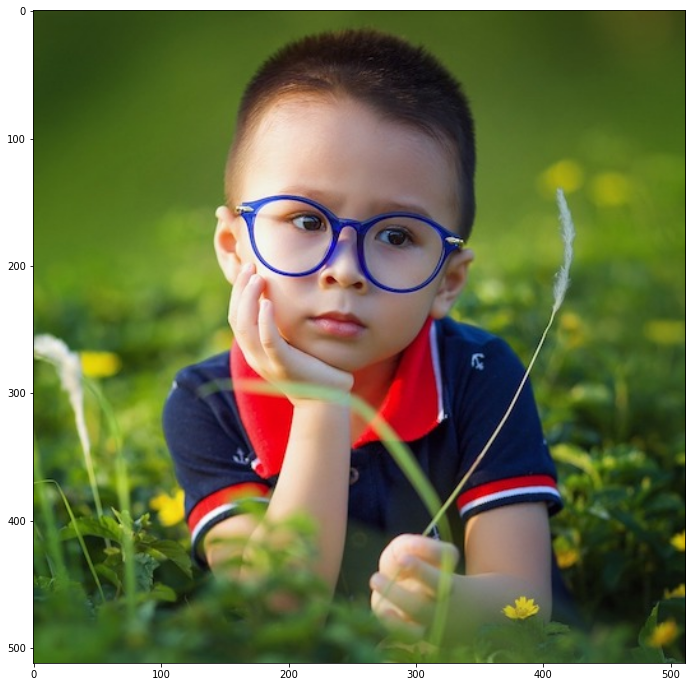

In [3]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
import cv2
from dataPath import DATA_PATH
%matplotlib inline

import matplotlib
matplotlib.rcParams['figure.figsize'] = (18.0, 12.0)
matplotlib.rcParams['image.interpolation'] = 'bilinear'

# Supress warnings
import warnings
warnings.filterwarnings("ignore")

img = cv2.imread(DATA_PATH+"sample.jpg")

plt.imshow(img[:,:,::-1]);plt.show()

Original Image Datatype : float64


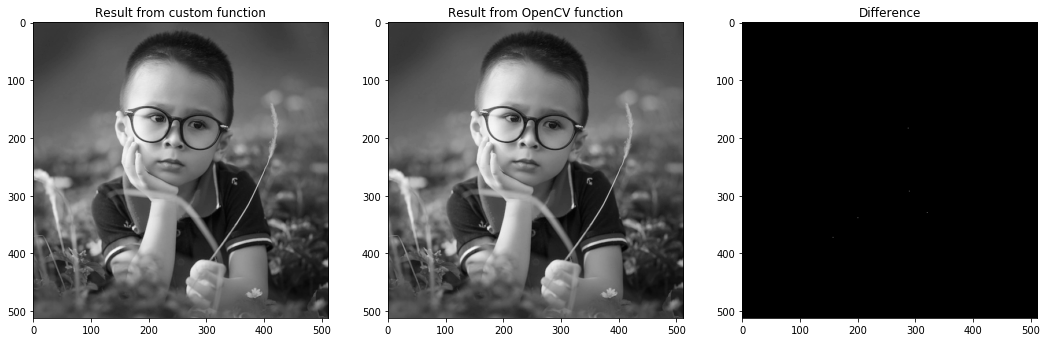

In [8]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
import cv2
from dataPath import DATA_PATH
%matplotlib inline

import matplotlib
matplotlib.rcParams['figure.figsize'] = (12.0, 12.0)
matplotlib.rcParams['image.interpolation'] = 'bilinear'

# Supress warnings
import warnings
warnings.filterwarnings("ignore")

img = cv2.imread(DATA_PATH+"sample.jpg")


def convertBGRtoGray(image):
    ###
    ### YOUR CODE HERE
    # Get the image's height, width, and channels
    height, width, channel = img.shape
    B, G, R = cv2.split(img)
    for i in np.arange(height):
        for j in np.arange(width):
            
            # RGB to Grayscale
            y = 0.299*R + 0.587*G + 0.1140*B
            r = np.round(y)
            print("Original Image Datatype : {}".format(r.dtype))
            
            r.astype(np.int)
            return r
    
    ###
    
gray = convertBGRtoGray(img)

gray_cv = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(18,12))
plt.subplot(1,3,1)
plt.title("Result from custom function")
plt.imshow(gray,cmap="gray")
plt.subplot(1,3,2)
plt.title("Result from OpenCV function")
plt.imshow(gray_cv,cmap="gray")
plt.subplot(1,3,3)
plt.title("Difference")
plt.imshow(np.abs(gray-gray_cv),cmap="gray")
plt.show()

In [53]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
import cv2
from dataPath import DATA_PATH
%matplotlib inline

import matplotlib
matplotlib.rcParams['figure.figsize'] = (12.0, 12.0)
matplotlib.rcParams['image.interpolation'] = 'bilinear'

# Supress warnings
import warnings
warnings.filterwarnings("ignore")

img = cv2.imread(DATA_PATH+"sample.jpg")

# Get the image's height, width, and channels
height, width, channel = img.shape

# Create balnk HSV image
img_hsv = np.zeros((height,width,3))

# CALCULATE
for i in np.arange(height):
    for j in np.arange(width):
        r = img.item(i,j,0)
        g = img.item(i,j,1)
        b = img.item(i,j,2)

        r_ = r/255.
        g_ = g/255.
        b_ = b/255.
        Cmax = max(r_,g_,b_)
        Cmin = min(r_,g_,b_)
        delta = Cmax-Cmin

        # Hue Calculation
        if delta == 0:
            H = 0
        elif Cmax == r_ :
            H = 60 * (((g_ - b_)/delta) % 6)
        elif Cmax == g_:
            H = 60 * (((b_ - r_)/delta) + 2)
        elif Cmax == b_:
            H = 60 * (((r_ - g_)/delta) + 4)

        # Saturation Calculation
        if Cmax == 0:
            S = 0
        else :
            S = delta / Cmax
        
        # Value Calculation
        V = Cmax 
        
        # Set H,S,and V to image
        img_hsv.itemset((i,j,0),int(H))
        img_hsv.itemset((i,j,1),int(S))
        img_hsv.itemset((i,j,2),int(V))
        
# Write image
cv2.imwrite('image_hsv.jpg', img_hsv)

# View image
cv2.imshow('image', img_hsv)
cv2.waitKey(0)
cv2.destroyAllWindows()        

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original Image Datatype : float64
Original Image Datatype : uint8


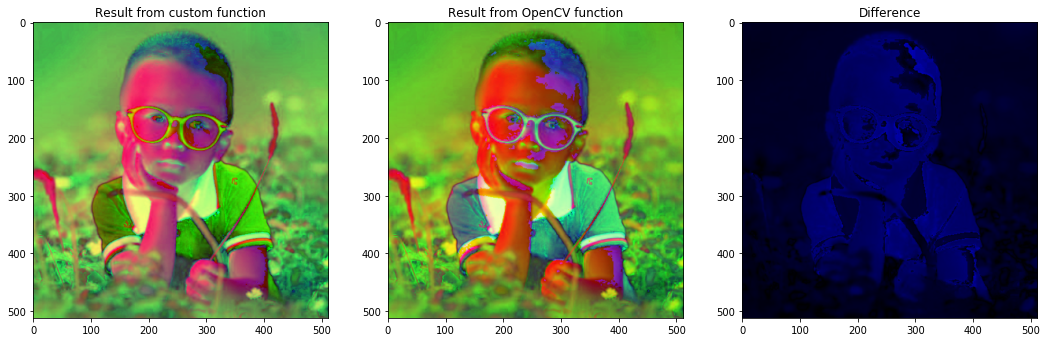

In [61]:
## CFORRECT CODE ##

# Import modules
import numpy as np
import matplotlib.pyplot as plt
import cv2
from dataPath import DATA_PATH
%matplotlib inline

import matplotlib
matplotlib.rcParams['figure.figsize'] = (12.0, 12.0)
matplotlib.rcParams['image.interpolation'] = 'bilinear'

# Supress warnings
import warnings
warnings.filterwarnings("ignore")

img = cv2.imread(DATA_PATH+"sample.jpg")


def convertBGRtoHSV(image):
    ###
    ### YOUR CODE HERE
    # Get the image's height, width, and channels
    height, width, channel = img.shape

    # Create balnk HSV image
    img_hsv = np.zeros((height,width,3))
 
    img_ = img/255.0 
    for i in np.arange(height):
        for j in np.arange(width):
            
            r_ = img_.item(i,j,0)
            g_ = img_.item(i,j,1)
            b_ = img_.item(i,j,2)
            
            Cmax = max(r_,g_,b_)
            Cmin = min(r_,g_,b_)
            delta = Cmax-Cmin
            # Hue Calculation
            if delta == 0:
                H = 0
            elif Cmax == r_ :
                H = 60 * ((g_ - b_)/delta)
            elif Cmax == g_:
                H = 120 + 60 * ((b_ - r_)/delta)
            elif Cmax == b_:
                H = 240 + 60 * ((r_ - g_)/delta)
            # Saturation Calculation
            if Cmax == 0:
                S = 0
            else :
                S = delta / Cmax

            # Value Calculation
            V = Cmax 

            V = 255 * V 
            S = 255 * S
            H = H/2
            
            #print("Original Image Datatype : {}".format(H.dtype))
            
            # Set H,S,and V to image
            img_hsv.itemset((i,j,0),H)
            img_hsv.itemset((i,j,1),S)
            img_hsv.itemset((i,j,2),V)
                        
    rnd = np.round(img_hsv)
    
    #rnd.astype(int)
    print("Original Image Datatype : {}".format(rnd.dtype))        
            
    return rnd.astype(np.int)             
     
    ###
    
hsv = convertBGRtoHSV(img)

hsv_cv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
print("Original Image Datatype : {}".format(hsv_cv.dtype))
plt.figure(figsize=(18,12))
plt.subplot(1,3,1)
plt.title("Result from custom function")
plt.imshow(hsv[:,:,::-1])
plt.subplot(1,3,2)
plt.title("Result from OpenCV function")
plt.imshow(hsv_cv[:,:,::-1])
plt.subplot(1,3,3)
plt.title("Difference")
plt.imshow(np.abs(hsv-hsv_cv)[:,:,::-1])
plt.show()

In [12]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
import cv2
from dataPath import DATA_PATH
%matplotlib inline

import matplotlib
matplotlib.rcParams['figure.figsize'] = (12.0, 12.0)
matplotlib.rcParams['image.interpolation'] = 'bilinear'

# Supress warnings
import warnings
warnings.filterwarnings("ignore")

img = cv2.imread(DATA_PATH+"sample.jpg")

# Get the image's height, width, and channels
height,width,channel = img.shape

# Create balnk HSV image
img_hsv = np.zeros((height,width,3))

# ======================================================
# IMPLEMENTATION USING OPENCV LIBRARY 
# ======================================================
# img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# ======================================================
# IMPLEMENTATION WITHOUT OPENCV LIBRARY 
# ======================================================

# CALCULATE
for i in np.arange(height):
    for j in np.arange(width):
        r = img.item(i,j,0)
        g = img.item(i,j,1)
        b = img.item(i,j,2)

        r_ = r/255.
        g_ = g/255.
        b_ = b/255.
        Cmax = max(r_,g_,b_)
        Cmin = min(r_,g_,b_)
        delta = Cmax-Cmin

        # Hue Calculation
        if delta == 0:
            H = 0
        elif Cmax == r_ :
            H = 60 * ((g_ - b_)/delta)
        elif Cmax == g_:
            H = 120 + 60 * ((b_ - r_)/delta)
        elif Cmax == b_:
            H = 240 + 60 * ((r_ - g_)/delta)

        # Saturation Calculation
        if Cmax == 0:
            S = 0
        else :
            S = delta / Cmax
        
        # Value Calculation
        V = Cmax 
        
        # Set H,S,and V to image
        img_hsv.itemset((i,j,0),int(H))
        img_hsv.itemset((i,j,1),int(S))
        img_hsv.itemset((i,j,2),int(V))
        rnd = np.round(img_hsv)

# Write image
cv2.imwrite('image_hsv.jpg', rnd)

# View image
cv2.imshow('image', rnd)
cv2.waitKey(0)
cv2.destroyAllWindows()